In [1]:
import lenstronomy
lenstronomy.__version__

'1.11.5'

In [2]:
import numpy as np
from ler import LeR
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [3]:
ler = LeR(min_lensed_images=2, max_lensed_images=4)

Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_0.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_0.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_0.pickle


In [4]:
ler.batch_size = 10000
ler.selecting_n_lensed_detectable_events(nsamples=500, resume=False);

collected number of events =  0


100%|████████████████████████████████████████████████████████| 10000/10000 [00:29<00:00, 342.99it/s]


collected number of events =  88


100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4513.31it/s]


collected number of events =  166


100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4560.21it/s]


collected number of events =  245


100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4539.94it/s]


collected number of events =  324


100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4408.22it/s]


collected number of events =  408


100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4575.26it/s]


collected number of events =  487


100%|███████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4555.48it/s]


collected number of events =  569
trmming final result to size=500


In [6]:
ler.selecting_n_unlensed_detectable_events(nsamples=500);

collected number of events =  0
collected number of events =  61
collected number of events =  124
collected number of events =  180
collected number of events =  251
collected number of events =  323
collected number of events =  375
collected number of events =  464
collected number of events =  528
trmming final result to size=500


In [7]:
json_file = './lensed_params_detectable.json'
with open(json_file, "r", encoding='utf-8') as f:
    lensed_param = json.load(f)
    
json_file = './gw_params_detectable.json'
with open(json_file, "r", encoding='utf-8') as f:
    unlensed_param = json.load(f)

In [8]:
mu_rel0, dt_rel0, mu_rel90, dt_rel90 = \
    ler.relative_mu_dt_lensed(lensed_param=lensed_param, snr_threshold=[8.,8.])

dmu, dt = ler.relative_mu_dt_unlensed(param=unlensed_param, size=200)

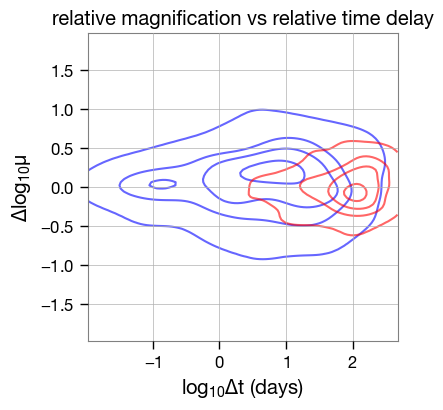

In [9]:
ler.mu_vs_dt_plot(x_array=dt_rel0, y_array=mu_rel0, ax=plt, colors='blue')
ler.mu_vs_dt_plot(x_array=dt, y_array=dmu, ax=plt, colors='red')
plt.show()

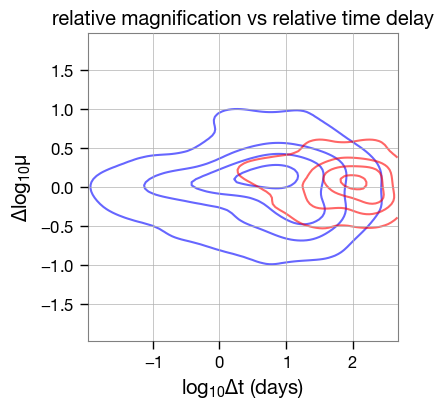

In [8]:
ler.mu_vs_dt_plot(x_array=dt_rel0, y_array=mu_rel0, ax=plt, colors='blue')
ler.mu_vs_dt_plot(x_array=dt, y_array=dmu, ax=plt, colors='red')
plt.show()

In [1]:
import numpy as np
from ler import LeR
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
ler = LeR(min_lensed_images=2, max_lensed_images=4)

Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_0.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_0.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_0.pickle


In [4]:
lensed_params = ler.lensed_cbc_statistics(size=100000, resume=True);

chosen batch size = 25000. If you want to change batch size, self.batch_size = new_size
There will be 4 batche(s)
resuming from ./lensed_params.json
Batch no. 3
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4476.33it/s]


calculating snrs...
Batch no. 4
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4541.13it/s]


calculating snrs...


In [10]:
json_file = './lensed_params_detectable.json'
with open(json_file, "r", encoding='utf-8') as f:
    lensed_param = json.load(f)

In [11]:
lensed_param.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'e1', 'e2', 'gamma1', 'gamma2', 'Dl', 'Ds', 'Dls', 'theta_E', 'gamma', 'mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'weights', 'opt_snr_net', 'L1', 'H1', 'V1'])

In [12]:
# select according to arrival time
dt_eff = np.array(lensed_param['time_delays'])

dt12 = abs(dt_eff[:,1]-dt_eff[:,0])/ (24*3600)
dt13 = abs(dt_eff[:,2]-dt_eff[:,0])/ (24*3600)
dt14 = abs(dt_eff[:,3]-dt_eff[:,0])/ (24*3600)
# dt12 = abs(dt_eff[:,1]-dt_eff[:,0])
# dt13 = abs(dt_eff[:,2]-dt_eff[:,0])
# dt14 = abs(dt_eff[:,3]-dt_eff[:,0])

# select only detectable
snr_l = np.array(lensed_param['opt_snr_net'])
dt12 = dt12[snr_l[:,1]>8]
dt13 = dt13[snr_l[:,2]>8]
dt14 = dt14[snr_l[:,3]>8]

# select only non-nan values
dt12 = dt12[~np.isnan(dt12)]
dt12 = dt12[~np.isnan(dt12)]
dt12 = dt12[~np.isnan(dt12)]

log_t12 = np.log10(dt12)
log_t13 = np.log10(dt13)
log_t14 = np.log10(dt14)

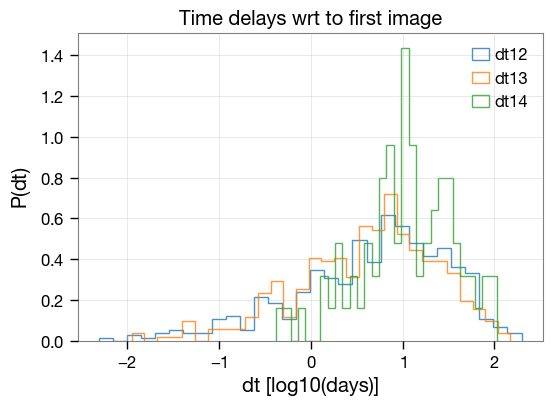

In [13]:
# plot time delays
plt.figure(figsize=(6, 4))
plt.hist(log_t12, bins=30, alpha=0.8, label='dt12', density=True, histtype='step')
plt.hist(log_t13, bins=30, alpha=0.8, label='dt13', density=True, histtype='step')
plt.hist(log_t14, bins=30, alpha=0.8, label='dt14', density=True, histtype='step')
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'dt [log10(days)]')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays wrt to first image')
plt.show()